In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
df = pd.read_csv('function_time.csv')
df = df.drop(df[df['successful verification'] == False].index)
df = df.drop(['successful verification', 'cbmc time'], axis=1)


In [19]:
for keyword in ['multiplication operator', 'divide operator', \
 'less operator', 'lessEq operator', \
 'greater operator', 'greaterEq operator', \
 'eq operator', 'neq operator', 'and operator', \
 'or operator', 'decrement operator', \
 'increment operator', 'if statement', \
 '? statement', 'switch statement', \
 'continue statement', 'break statement', \
 'recursion block', 'garbage block', 'bitleft operator']:
    df[keyword] = np.int32((df['func-1 ' + keyword] == 0) & (df['func-2 ' + keyword] == 1))
    
df['for-while'] = np.int32((df['func-1 for loop'] == 1) & (df['func-2 for loop'] == 0) \
                & (df['func-2 while loop'] == 1))
df['for-goto'] = np.int32((df['func-1 for loop'] == 1) & (df['func-2 for loop'] == 0) \
                & (df['func-2 goto loop'] == 1))
df['while-goto'] = np.int32((df['func-1 while loop'] == 1) & (df['func-2 while loop'] == 0) \
                & (df['func-2 goto loop'] == 1))

df = df.drop(df.loc[:, 'func-1 for loop':'func-2 garbage block'], axis=1)

In [20]:
# dummies = pd.get_dummies(df['file name'])
# df = pd.concat([df, dummies], axis=1)
df = df.drop(['file name'], axis=1)

df['execution time'] *= 1000

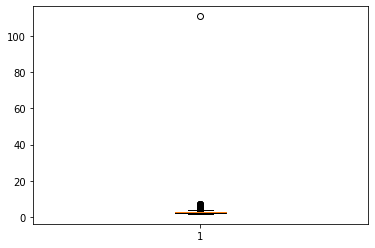

In [21]:
plt.boxplot(df['execution time'])
plt.savefig('boxplot.svg', format='svg', dps=1000)
plt.show()

In [22]:
scaler = StandardScaler()
scaler.fit(pd.DataFrame(df['execution time']))
x = df.drop('execution time', axis=1)
y = pd.DataFrame(df['execution time'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [23]:
model = linear_model.RidgeCV(alphas=[1e-2, 5e-2, 1e-1, 5e-1, 1, 5, 10, 50, 100])
model.fit(x_train, y_train)
coefficients = pd.Series(data=model.coef_[0], index=df.drop('execution time', axis=1).columns)
print(coefficients)

func-2 bitleft operator     -0.108663
--depth                     -0.133722
--unwind                    -0.040374
--partial-loops              0.007922
--no-unwinding-assertions    0.039416
multiplication operator      0.000000
divide operator              0.000000
less operator                0.006492
lessEq operator              0.030497
greater operator            -0.034598
greaterEq operator          -0.043158
eq operator                  0.007532
neq operator                 0.038464
and operator                -0.051455
or operator                 -0.088847
decrement operator           0.000000
increment operator          -0.085191
if statement                -0.023986
? statement                 -0.063204
switch statement            -0.076210
continue statement           0.000000
break statement             -0.076210
recursion block              0.000000
garbage block                0.000000
bitleft operator             0.000000
for-while                    0.048197
for-goto    

In [9]:
y_predict = model.predict(x_train)
train_error = r2_score(y_train, y_predict)
y_predict = model.predict(x_test)
test_error = r2_score(y_test, y_predict)

(train_error, test_error)

(0.0035318417204939223, 0.024338666184192226)

In [10]:
scaler.mean_, scaler.scale_

(array([2.70015682]), array([1.22191127]))